In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

!pip3 install xgboost==1.6.1
import xgboost as xgb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 192.9 MB 52 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
xgb.__version__

'1.6.1'

In [ ]:
from google.colab import files
files.upload()

# Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayazziaansari","key":"6d5ea84e900752cd596b5f8384c53471"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c sa2022
!unzip sa2022.zip

  0% 0.00/675k [00:00<?, ?B/s]
100% 675k/675k [00:00<00:00, 113MB/s]
Archive:  sa2022.zip
  inflating: Sample__submission.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df = pd.read_csv('train.csv', index_col='id')
test_df = pd.read_csv('test.csv', index_col='id')

In [ ]:
df.head()

,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
id,,,,,,,,,,,,,,,
16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [ ]:
df.shape

(15730, 15)

In [ ]:
df.describe()

,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,15730.000000,15730.000000,15730.000000,15052.000000,15152.000000,15142.000000,15191.000000,15499.000000,15730.000000,15730.000000,15730.000000
mean,4.012873,688.070693,1369.286777,3057.660776,423.976307,1585.239466,655.923310,357.260662,155.085188,275.500572,0.601526
std,0.298440,649.409586,1240.900227,11846.965689,1768.230384,6177.476241,2855.735531,1402.246610,558.650254,958.589075,0.489600
min,0.000000,69.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.900000,349.000000,699.000000,63.000000,9.000000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,4.000000,474.000000,999.000000,308.000000,44.000000,150.000000,60.000000,34.000000,17.000000,30.000000,1.000000
75%,4.200000,699.000000,1299.000000,1526.000000,215.000000,788.000000,300.000000,172.000000,77.000000,140.000000,1.000000
max,5.000000,5998.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


In [ ]:
df.isnull().any()

title         False
Rating        False
maincateg      True
platform      False
price1        False
actprice1     False
Offer %       False
norating1      True
noreviews1     True
star_5f        True
star_4f        True
star_3f        True
star_2f       False
star_1f       False
fulfilled1    False
dtype: bool

In [ ]:
test_df.isnull().any()

title         False
Rating         True
maincateg      True
platform      False
actprice1     False
norating1     False
noreviews1    False
star_5f        True
star_4f       False
star_3f       False
star_2f       False
star_1f        True
fulfilled1    False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15730 entries, 16695 to 13682
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       15730 non-null  object 
 1   Rating      15730 non-null  float64
 2   maincateg   15204 non-null  object 
 3   platform    15730 non-null  object 
 4   price1      15730 non-null  int64  
 5   actprice1   15730 non-null  int64  
 6   Offer %     15730 non-null  object 
 7   norating1   15052 non-null  float64
 8   noreviews1  15152 non-null  float64
 9   star_5f     15142 non-null  float64
 10  star_4f     15191 non-null  float64
 11  star_3f     15499 non-null  float64
 12  star_2f     15730 non-null  int64  
 13  star_1f     15730 non-null  int64  
 14  fulfilled1  15730 non-null  int64  
dtypes: float64(6), int64(5), object(4)
memory usage: 1.9+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5244 entries, 2242 to 13574
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       5244 non-null   object 
 1   Rating      5041 non-null   float64
 2   maincateg   5177 non-null   object 
 3   platform    5244 non-null   object 
 4   actprice1   5244 non-null   int64  
 5   norating1   5244 non-null   int64  
 6   noreviews1  5244 non-null   int64  
 7   star_5f     5176 non-null   float64
 8   star_4f     5244 non-null   int64  
 9   star_3f     5244 non-null   int64  
 10  star_2f     5244 non-null   int64  
 11  star_1f     5058 non-null   float64
 12  fulfilled1  5244 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 573.6+ KB


In [ ]:
df['norating1']=df['norating1'].fillna(0)

In [ ]:
df['noreviews1']=df['noreviews1'].fillna(0)

In [ ]:
df['star_5f'] = df['star_5f'].fillna(0)
df['star_4f'] = df['star_4f'].fillna(0)
df['star_3f'] = df['star_3f'].fillna(0)

test_df['star_5f'] = test_df['star_5f'].fillna(0)
test_df['star_1f'] = test_df['star_1f'].fillna(0)

In [ ]:
df['star_5f'] = df['star_5f'].astype('int64')
df['star_4f'] = df['star_4f'].astype('int64')
df['star_3f'] = df['star_3f'].astype('int64')
df['norating1'] = df['norating1'].astype('int64')
df['noreviews1'] = df['noreviews1'].astype('int64')

test_df['star_5f'] = test_df['star_5f'].astype('int64')
test_df['star_1f'] = test_df['star_1f'].astype('int64')

In [ ]:
df['fulfilled1'] = df['fulfilled1'].astype('uint8')
test_df['fulfilled1'] = test_df['fulfilled1'].astype('uint8')

In [ ]:
df[df['maincateg'].isnull()].head()

,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
id,,,,,,,,,,,,,,,
12336,Women Beige Heels Sandal,4.0,NaN,Flipkart,499,999,50.05%,0,0,28,9,10,2,5,0
20804,"Men Brown, Orange Sports Sandal",4.1,NaN,Flipkart,819,999,18.02%,26640,3667,14148,0,0,1113,2094,1
5575,Women Copper Flats Sandal,4.1,NaN,Flipkart,349,999,65.07%,0,27,0,0,22,5,15,1
4262,Slippers,3.6,NaN,Flipkart,213,249,14.46%,0,0,0,0,466,281,476,1
2767,Ace Slip-On Running Shoes For Men (Black),4.3,NaN,Flipkart,2999,4999,40.01%,0,0,46,27,5,1,5,1


In [ ]:
df['title'].value_counts()

Flip Flops                                  495
Slides                                      433
Slippers                                    356
Women Black Heels Sandal                    341
Women Black Wedges Sandal                   252
                                           ... 
Ebernon Low Casuals For Men  (White)          1
Casuals For Women  (Brown)                    1
CLASSIC PARTYWEAR Slip On For Men  (Tan)      1
KELDO Casuals For Men  (Black)                1
Blink Duo IDP Flip Flops                      1
Name: title, Length: 4782, dtype: int64

In [ ]:
temp = df[df['maincateg'].isnull()].copy()
women = ["Women", "Women's", "WOMEN", "Womens", "WOMENS"]
men = ["Men", "Men's", "Boy", "men"]

category = []
for title in temp['title'].values:
  title = title.replace(u'\xa0', u' ')
  if any(x in title.split(" ") for x in women):
    category.append("Women")
  elif any(x in title.split(" ") for x in men):
    category.append("Men")
  else:
    category.append(np.nan)

temp['maincateg'] = category

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df = pd.concat([df, temp])

In [ ]:
df[df['maincateg'].isnull()]['title'].value_counts()

Slides                                                                                                              16
Flip Flops                                                                                                          16
Slippers                                                                                                            15
Ketava Graphic v2 IDP Slippers                                                                                       1
Pink Fluffy Fur Bow Winter Slides                                                                                    1
crocs Unisex's Classic Clogs                                                                                         1
Gliders (from Liberty)                                                                                               1
Stamp IDP Flip Flops                                                                                                 1
NIKE CHROMA THONG 5 Slippers                    

In [ ]:
temp = test_df[test_df['Rating'].isnull()].copy()
rating = []

for i in range(len(temp)):
  rating.append(round((temp.iloc[i]['star_1f'] + 2*temp.iloc[i]['star_2f'] + 3*temp.iloc[i]['star_3f'] + 4*temp.iloc[i]['star_4f'] + 5*temp.iloc[i]['star_5f'])/temp.iloc[i]['norating1'], 1))

temp['Rating'] = rating

In [ ]:
test_df = test_df[test_df['Rating'].notna()]

In [ ]:
test_df = pd.concat([test_df, temp])

In [ ]:
temp = test_df[test_df['maincateg'].isnull()].copy()
women = ["Women", "Women's", "WOMEN", "Womens", "WOMENS"]
men = ["Men", "Men's", "Boy", "men"]

category = []
for title in temp['title'].values:
  title = title.replace(u'\xa0', u' ')
  if any(x in title.split(" ") for x in women):
    category.append("Women")
  elif any(x in title.split(" ") for x in men):
    category.append("Men")
  else:
    category.append(np.nan)

temp['maincateg'] = category

In [ ]:
test_df.dropna(axis=0, inplace=True)

In [ ]:
test_df = pd.concat([test_df, temp])

In [ ]:
test_df[test_df['maincateg'].isnull()]['title'].value_counts()

Flip Flops                     3
Slides                         2
Slippers                       1
Wink Duo GU2 IDP Flip Flops    1
Name: title, dtype: int64

In [ ]:
df['platform'].value_counts()

Flipkart    15389
Amazon        341
Name: platform, dtype: int64

In [ ]:
test_df['platform'].value_counts()

Flipkart    5140
Amazon       104
Name: platform, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['maincateg'])
test_df = pd.get_dummies(test_df, columns=['maincateg'])

In [ ]:
le = LabelEncoder()
df['platform'] = le.fit_transform(df['platform']).astype('uint8')
test_df['platform'] = le.transform(test_df['platform']).astype('uint8')

In [ ]:
df.drop(['title', 'Offer %'], axis=1, inplace=True)
test_df.drop(['title'], axis=1, inplace=True)

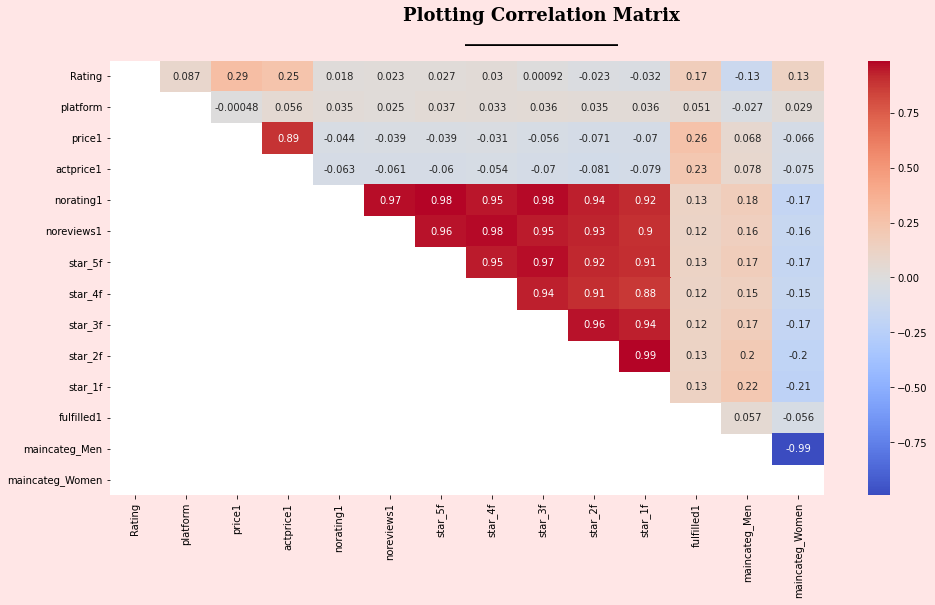

In [ ]:
# Converting categorical object type to sparse matrix
corr_matrix = df.corr()
# Create a mask
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

fig=plt.figure(figsize=(16, 8))
fig.suptitle('Plotting Correlation Matrix\n_________________', y=0.94, horizontalalignment='center', verticalalignment='center',fontsize=18, fontweight='bold',
              fontfamily='serif', color="black")
background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color)

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.show()

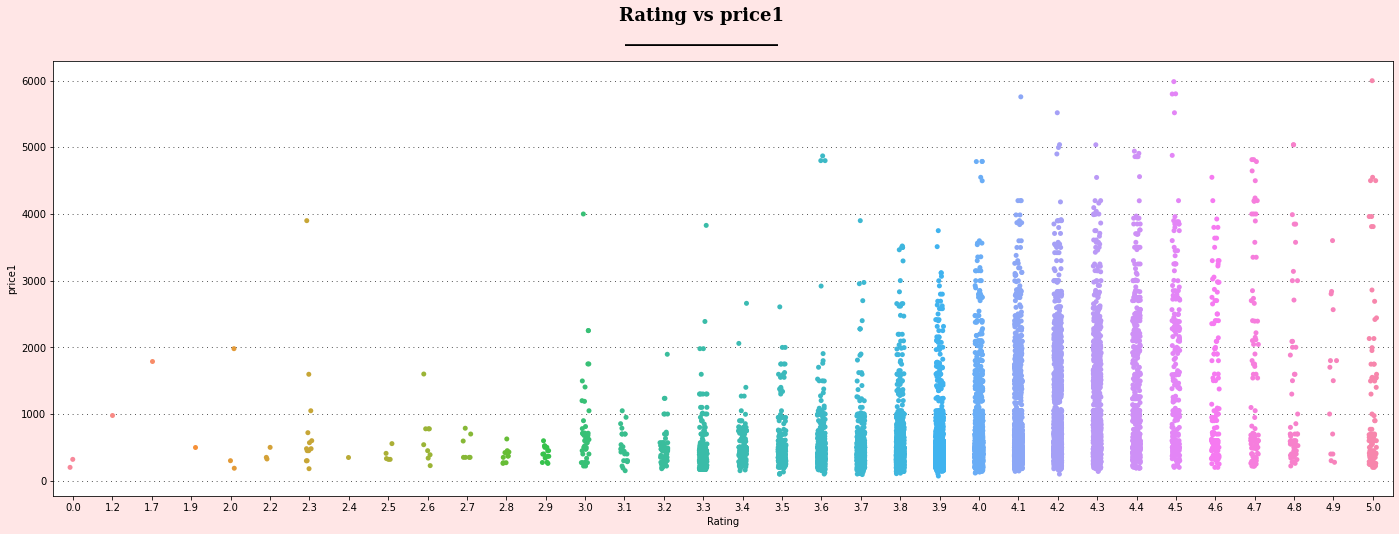

In [ ]:
fig=plt.figure(figsize=(24, 8))

fig.patch.set_facecolor(background_color)
fig.suptitle('Rating vs price1\n_________________', y=0.94, horizontalalignment='center', verticalalignment='center',fontsize=18, fontweight='bold',
              fontfamily='serif', color="black")

sns.stripplot(data=df, x='Rating', y='price1')
plt.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

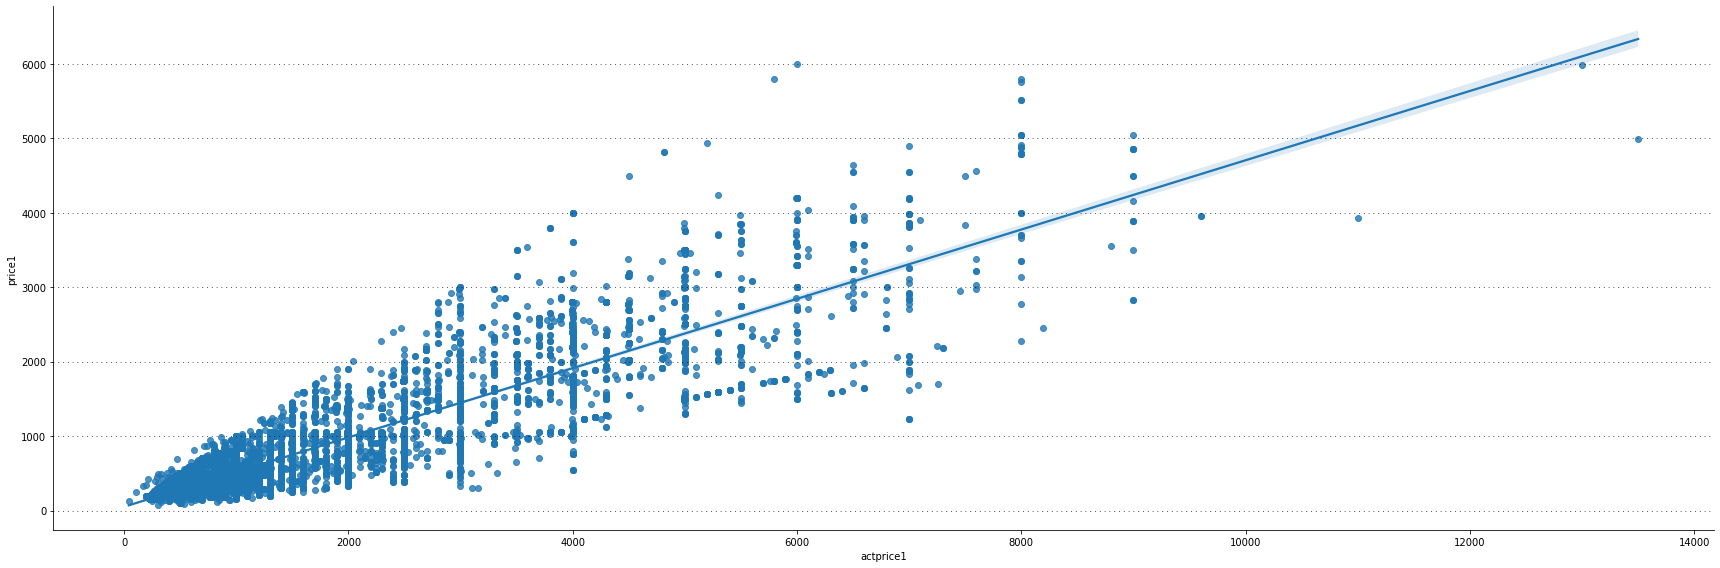

In [ ]:
sns.lmplot(data=df, x='actprice1', y='price1', height=8, aspect=3)
plt.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

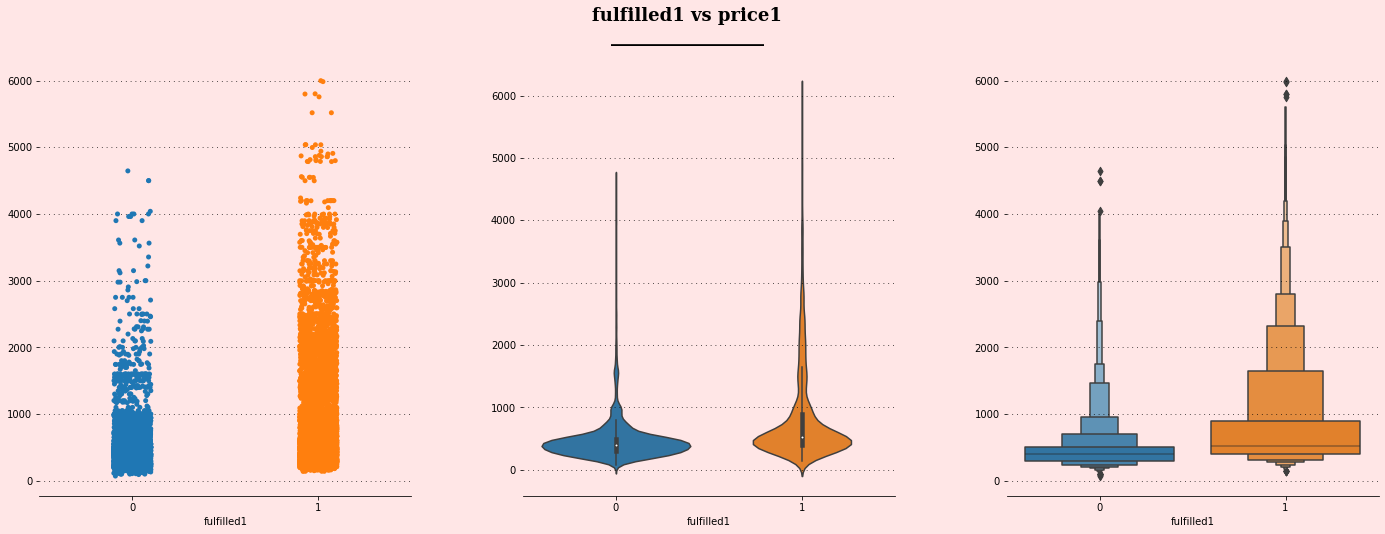

In [ ]:
fig=plt.figure(figsize=(24, 8))
gs=fig.add_gridspec(1,3)
gs.update(wspace=0.3, hspace=0.2)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])

fig.patch.set_facecolor(background_color)
fig.suptitle('fulfilled1 vs price1\n_________________', y=0.94, horizontalalignment='center', verticalalignment='center',fontsize=18, fontweight='bold',
              fontfamily='serif', color="black")

sns.stripplot(data=df, x='fulfilled1', y='price1', ax=ax1)
ax1.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sns.violinplot(data=df, x='fulfilled1', y='price1', ax=ax2)
ax2.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sns.boxenplot(data=df, x='fulfilled1', y='price1', ax=ax3)
ax3.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

for ax in [ax1, ax2, ax3]:
  ax.set_facecolor(background_color)
  ax.set_ylabel(None)
  for borders in ["top","right","left"]:
    ax.spines[borders].set_visible(False)

plt.show()

In [ ]:
target = df.pop('price1')

In [ ]:
con_cols = ['Rating', 'actprice1', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f']
cat_cols = ['platform', 'fulfilled1', 'maincateg_Men', 'maincateg_Women']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df, target, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train[con_cols] = scaler.fit_transform(X_train[con_cols])
X_val[con_cols] = scaler.transform(X_val[con_cols])
test_df[con_cols] = scaler.transform(test_df[con_cols])

# XGB

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [ ]:
df1 = df.copy()
df1[con_cols] = scaler.transform(df1[con_cols])

In [ ]:
dcv = xgb.DMatrix(df1, label=target)

In [ ]:
params = {
    'max_depth':8,
    'min_child_weight': 1,
    'eta':0.1,
    'subsample': 1,
    'colsample_bytree': 1,
    'eval_metric': 'rmse',
}

In [ ]:
num_boost_round = 1000

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dval, "Val")],
    early_stopping_rounds=20
)

print("Best rmse: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

[0]	Val-rmse:858.342
Will train until Val-rmse hasn't improved in 20 rounds.
[1]	Val-rmse:782.533
[2]	Val-rmse:714.581
[3]	Val-rmse:654.342
[4]	Val-rmse:600.715
[5]	Val-rmse:552.632
[6]	Val-rmse:510.522
[7]	Val-rmse:473.467
[8]	Val-rmse:440.879
[9]	Val-rmse:412.547
[10]	Val-rmse:387.82
[11]	Val-rmse:365.264
[12]	Val-rmse:346.504
[13]	Val-rmse:330.523
[14]	Val-rmse:316.095
[15]	Val-rmse:303.365
[16]	Val-rmse:292.705
[17]	Val-rmse:282.715
[18]	Val-rmse:274.557
[19]	Val-rmse:267.982
[20]	Val-rmse:261.847
[21]	Val-rmse:256.864
[22]	Val-rmse:253.061
[23]	Val-rmse:249.561
[24]	Val-rmse:245.968
[25]	Val-rmse:243.359
[26]	Val-rmse:241.101
[27]	Val-rmse:238.843
[28]	Val-rmse:237.092
[29]	Val-rmse:235.112
[30]	Val-rmse:233.34
[31]	Val-rmse:232.27
[32]	Val-rmse:231.372
[33]	Val-rmse:230.413
[34]	Val-rmse:229.704
[35]	Val-rmse:228.404
[36]	Val-rmse:227.437
[37]	Val-rmse:226.707
[38]	Val-rmse:225.829
[39]	Val-rmse:225.247
[40]	Val-rmse:224.802
[41]	Val-rmse:223.966
[42]	Val-rmse:223.368
[43]	Val-rm

In [ ]:
cv_results = xgb.cv(
    params,
    dcv,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=4,
    metrics={'rmse'},
    early_stopping_rounds=20
)

cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,859.235062,4.805607,859.978958,14.382449
1,781.717545,4.486880,783.476944,13.516075
2,712.387512,4.102546,715.413651,13.593757
3,650.286179,3.772440,654.879989,13.780268
4,594.713578,3.560288,601.174958,13.933330
...,...,...,...,...
677,32.244683,1.124562,205.962105,14.040431
678,32.213986,1.136499,205.961864,14.041560
679,32.161231,1.150804,205.959423,14.053117
680,32.116847,1.172583,205.956543,14.057994


In [ ]:
cv_results['test-rmse-mean'].min()

205.95490650000002

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(7,12)
    for min_child_weight in range(1,5)
]

In [ ]:
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    cv_results = xgb.cv(
        params,
        dcv,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )

    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\trmse {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, rmse: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=7, min_child_weight=1
	rmse 202.0266324 for 663 rounds
CV with max_depth=7, min_child_weight=2
	rmse 203.0938384 for 441 rounds
CV with max_depth=7, min_child_weight=3
	rmse 202.8456544 for 530 rounds
CV with max_depth=7, min_child_weight=4
	rmse 204.2039796 for 649 rounds
CV with max_depth=8, min_child_weight=1
	rmse 203.65827940000003 for 492 rounds
CV with max_depth=8, min_child_weight=2
	rmse 201.77164620000002 for 501 rounds
CV with max_depth=8, min_child_weight=3
	rmse 202.37065139999999 for 586 rounds
CV with max_depth=8, min_child_weight=4
	rmse 205.07647699999998 for 446 rounds
CV with max_depth=9, min_child_weight=1
	rmse 204.665311 for 400 rounds
CV with max_depth=9, min_child_weight=2
	rmse 203.1260012 for 456 rounds
CV with max_depth=9, min_child_weight=3
	rmse 202.993515 for 493 rounds
CV with max_depth=9, min_child_weight=4
	rmse 205.02352000000002 for 411 rounds
CV with max_depth=10, min_child_weight=1
	rmse 204.8752014 for 349 rounds
CV with max_depth

In [ ]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]
params

{'colsample_bytree': 1,
 'eta': 0.1,
 'eval_metric': 'rmse',
 'max_depth': 8,
 'min_child_weight': 2,
 'subsample': 1}

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,11)]
    for colsample in [i/10. for i in range(5,11)]
]

In [ ]:
min_rmse = float("Inf")
best_params = None

for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))

    params['subsample'] = subsample
    params['colsample_bytree'] = colsample

    cv_results = xgb.cv(
        params,
        dcv,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )

    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\trmse {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, rmse: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=1.0, colsample=1.0
	rmse 201.77164620000002 for 501 rounds
CV with subsample=1.0, colsample=0.9
	rmse 203.1915436 for 526 rounds
CV with subsample=1.0, colsample=0.8
	rmse 201.9258728 for 675 rounds
CV with subsample=1.0, colsample=0.7
	rmse 203.0518918 for 528 rounds
CV with subsample=1.0, colsample=0.6
	rmse 202.3562346 for 601 rounds
CV with subsample=1.0, colsample=0.5
	rmse 203.41009219999998 for 680 rounds
CV with subsample=0.9, colsample=1.0
	rmse 201.7560668 for 422 rounds
CV with subsample=0.9, colsample=0.9
	rmse 199.5444824 for 515 rounds
CV with subsample=0.9, colsample=0.8
	rmse 200.0997496 for 425 rounds
CV with subsample=0.9, colsample=0.7
	rmse 201.04949319999997 for 358 rounds
CV with subsample=0.9, colsample=0.6
	rmse 203.3647766 for 423 rounds
CV with subsample=0.9, colsample=0.5
	rmse 204.7879092 for 326 rounds
CV with subsample=0.8, colsample=1.0
	rmse 202.54666760000003 for 424 rounds
CV with subsample=0.8, colsample=0.9
	rmse 202.644928 for 489 

In [ ]:
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]
params

{'colsample_bytree': 0.9,
 'eta': 0.1,
 'eval_metric': 'rmse',
 'max_depth': 8,
 'min_child_weight': 2,
 'subsample': 0.9}

In [ ]:
%time

min_rmse = float("Inf")
best_params = None
for eta in [.3, .1, .03, .01]:
    print("CV with eta={}".format(eta))

    params['eta'] = eta

    %time cv_results = xgb.cv(params, dcv, num_boost_round=num_boost_round, seed=42, nfold=4, metrics=['rmse'], early_stopping_rounds=10)

    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\trmse {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, rmse: {}".format(best_params, min_rmse))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
CV with eta=0.3
CPU times: user 25.6 s, sys: 93.2 ms, total: 25.7 s
Wall time: 13.1 s
	rmse 214.0426445 for 163 rounds

CV with eta=0.1
CPU times: user 1min 1s, sys: 240 ms, total: 1min 1s
Wall time: 31.7 s
	rmse 206.798855 for 409 rounds

CV with eta=0.03
CPU times: user 2min 25s, sys: 521 ms, total: 2min 26s
Wall time: 1min 14s
	rmse 203.81531900000002 for 998 rounds

CV with eta=0.01
CPU times: user 2min 28s, sys: 491 ms, total: 2min 28s
Wall time: 1min 16s
	rmse 211.92805099999998 for 999 rounds

Best params: 0.03, rmse: 203.81531900000002


In [ ]:
params['eta'] = best_params
params

{'colsample_bytree': 0.9,
 'eta': 0.03,
 'eval_metric': 'rmse',
 'max_depth': 8,
 'min_child_weight': 2,
 'subsample': 0.9}

In [ ]:
num_boost_round = 2500

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dval, "Val")],
    early_stopping_rounds=20
)

print("Best rmse: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

[0]	Val-rmse:923.872
Will train until Val-rmse hasn't improved in 20 rounds.
[1]	Val-rmse:899.018
[2]	Val-rmse:874.932
[3]	Val-rmse:851.673
[4]	Val-rmse:829.203
[5]	Val-rmse:807.241
[6]	Val-rmse:785.925
[7]	Val-rmse:765.418
[8]	Val-rmse:745.467
[9]	Val-rmse:726.056
[10]	Val-rmse:707.361
[11]	Val-rmse:689.421
[12]	Val-rmse:672.043
[13]	Val-rmse:659.135
[14]	Val-rmse:642.881
[15]	Val-rmse:626.962
[16]	Val-rmse:611.716
[17]	Val-rmse:597.045
[18]	Val-rmse:582.651
[19]	Val-rmse:568.849
[20]	Val-rmse:555.469
[21]	Val-rmse:542.446
[22]	Val-rmse:530.038
[23]	Val-rmse:518.063
[24]	Val-rmse:506.56
[25]	Val-rmse:495.216
[26]	Val-rmse:484.392
[27]	Val-rmse:473.925
[28]	Val-rmse:465.895
[29]	Val-rmse:456.053
[30]	Val-rmse:446.491
[31]	Val-rmse:439.418
[32]	Val-rmse:430.557
[33]	Val-rmse:422.015
[34]	Val-rmse:413.599
[35]	Val-rmse:405.652
[36]	Val-rmse:397.826
[37]	Val-rmse:392.156
[38]	Val-rmse:385.323
[39]	Val-rmse:378.523
[40]	Val-rmse:373.488
[41]	Val-rmse:367.195
[42]	Val-rmse:360.827
[43]	Val-

In [ ]:
params

{'colsample_bytree': 0.9,
 'eta': 0.03,
 'eval_metric': 'rmse',
 'max_depth': 8,
 'min_child_weight': 2,
 'subsample': 0.9}

In [ ]:
model = xgb.XGBRegressor(n_estimators=20000,
                         max_depth=8,
                         learning_rate=0.03,
                         min_child_weight=2,
                         subsample=0.9,
                         colsample_bytree=0.9,
                         objective='reg:squarederror',
                         n_jobs=-1,
                         random_state=42)
history = model.fit(df1, target)

In [ ]:
pred = model.predict(test_df)

In [ ]:
submission = pd.DataFrame({
    'id': test_df.index,
    'price1': pred
})

submission.head()

,id,price1
0,2242,431.359680
1,20532,282.660431
2,10648,492.789856
3,20677,781.311462
4,12593,403.916992


In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
!kaggle competitions submit -c sa2022 -f submission.csv -m "Message"

100% 77.2k/77.2k [00:02<00:00, 26.5kB/s]
400 - Bad Request
